# Nodal Involvement prediction model

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import brier_score_loss
from unified_functions import *

pd.set_option('display.max_columns', None)

b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\dalex\_global_checks.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


## Load data

In [2]:
df = pd.read_csv('../materials/processed_df_new.csv')
df.head()

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE,MRI EPE L,MRI EPE P,MRI SVI,MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
0,ID00000,63.0,5.11,0.146000,35.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2,0.0,0.0,1.0,1.0
1,ID00008,64.0,5.39,0.179667,30.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,1,3.0,3.0,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,1.0,0.0,0.0,3.0
2,ID00500,64.0,8.30,0.207500,40.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,1.0
3,ID00001,56.0,6.80,0.200000,34.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,2,1.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,t2c,0.0,0.0,0.0,2.0
4,ID00002,59.0,40.00,2.222222,18.0,5.0,1.0,1.0,0.0,1.0,1.0,0.0,18.0,1,2.0,5.0,4.0,5.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,t3a,0.0,1.0,0.0,2.0


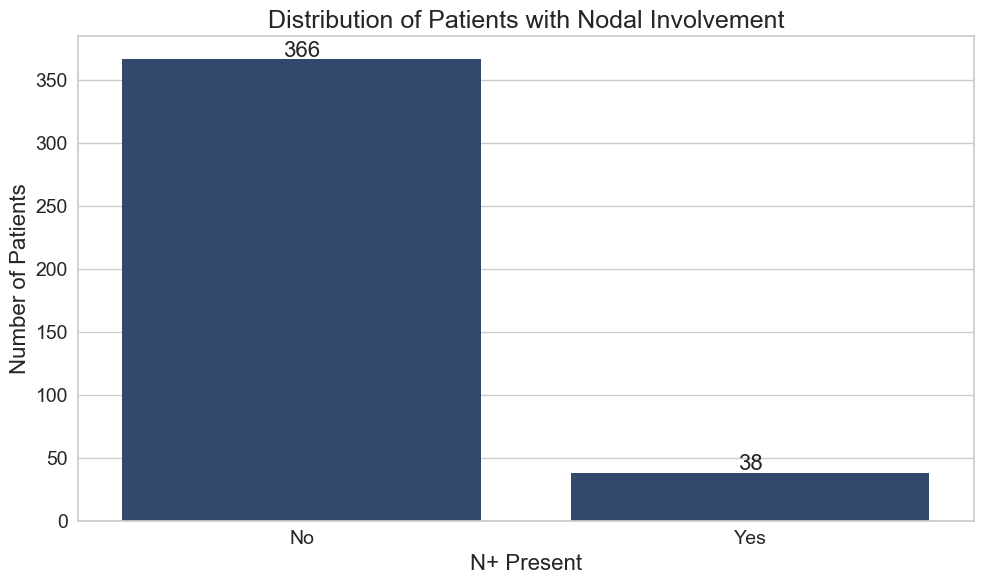

In [3]:
plot_distribution(df, 'N +', 'Distribution of Patients with Nodal Involvement', 'N+ Present')

In [4]:
numerical_cols = ['wiek', 'PSA', 'PSAdensity', 'MRI vol', 'MRI SIZE']
categorical_cols = ['MRI Pirads', 'MRI EPE', 'MRI SVI', 'Bx ISUP Grade']

X = df[numerical_cols + categorical_cols]
y = df['N +']

## Plain XGBoost

Training model with default hyperparameters...

Fold 0:
ROC AUC score: 0.8127413127413128

Fold 1:
ROC AUC score: 0.8784246575342466

Fold 2:
ROC AUC score: 0.9195205479452054

Fold 3:
ROC AUC score: 0.8767123287671232

Fold 4:
ROC AUC score: 0.8180039138943249

Total scores:
ROC AUC score: 0.8614466494104113



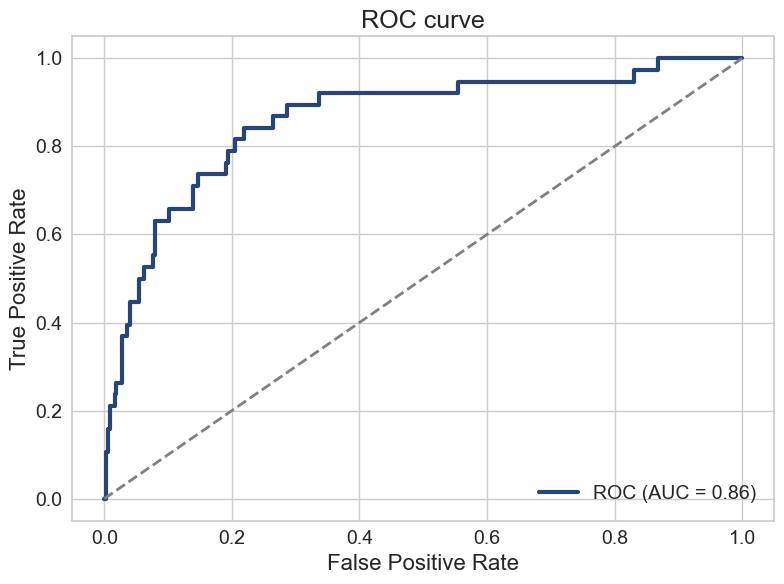

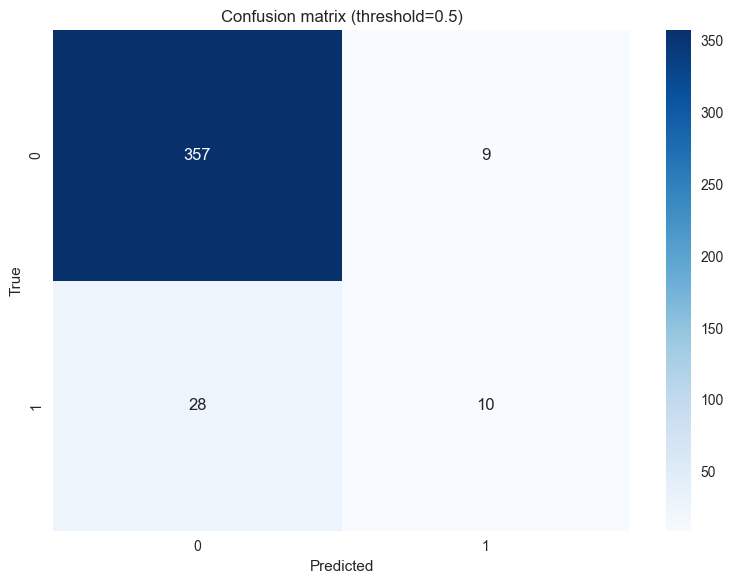

Sensitivity: 0.2632
Specificity: 0.9754
Accuracy: 0.9084
Preparation of a new explainer is initiated

  -> data              : 404 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x000001E55C7734C0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 5.68e-05, mean = 0.0853, max = 0.987
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.809, mean = 0.00881, max = 1.0
  -> model_info        : package sklearn

A new explainer has been created!


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



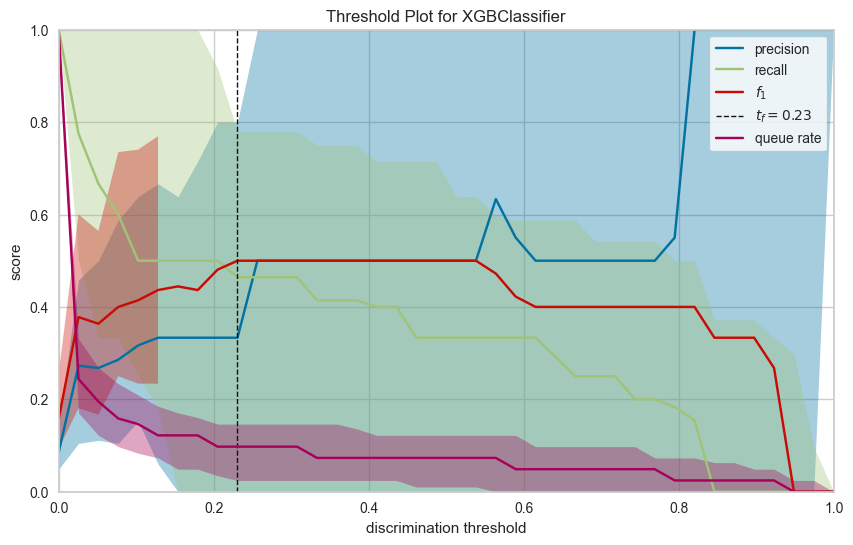

Brier score: 0.0685


In [5]:
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc, fig_width=800)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y, title='Feature Importances for Nodal Involvement Prediction')
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")

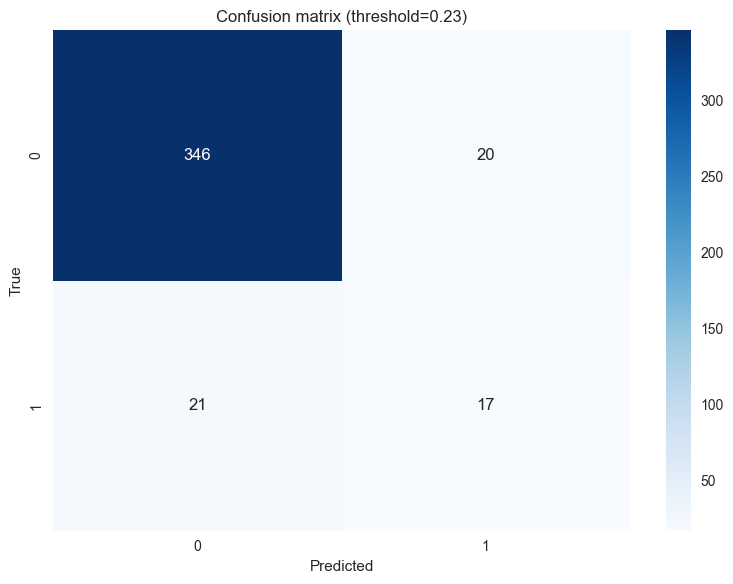

Sensitivity: 0.4474
Specificity: 0.9454
Accuracy: 0.8985


In [20]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.23)

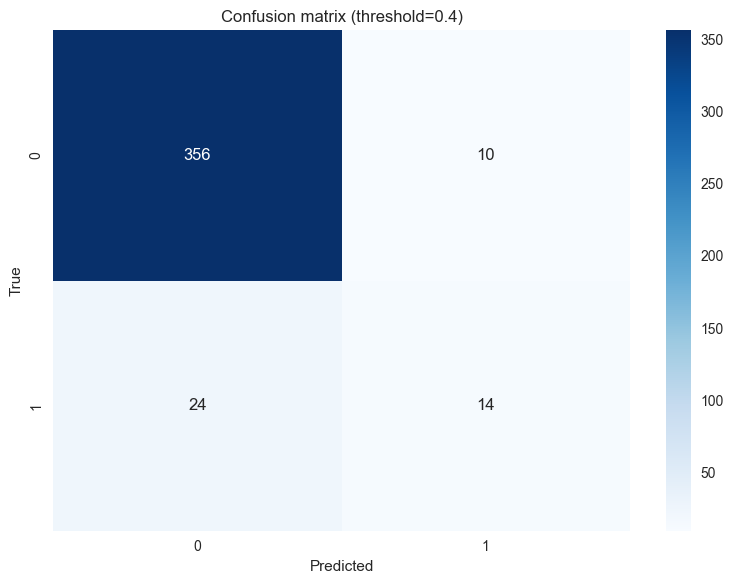

Sensitivity: 0.3684
Specificity: 0.9727
Accuracy: 0.9158


In [21]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.4)

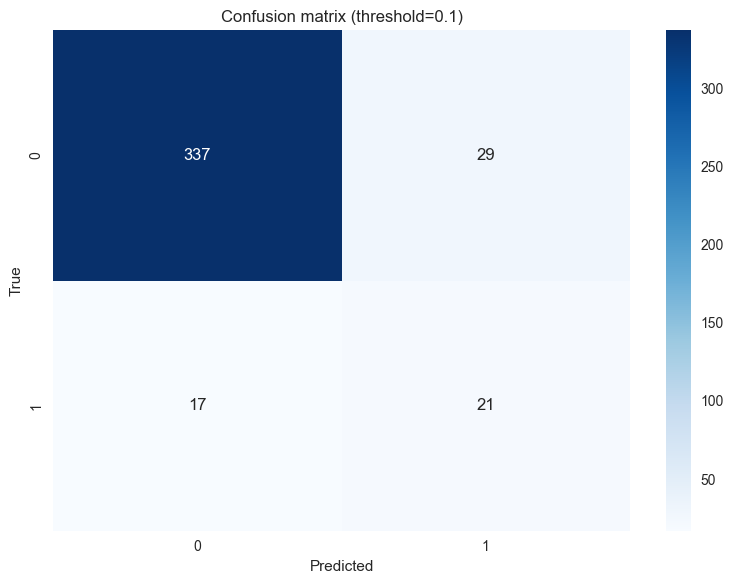

Sensitivity: 0.5526
Specificity: 0.9208
Accuracy: 0.8861


In [22]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.1)

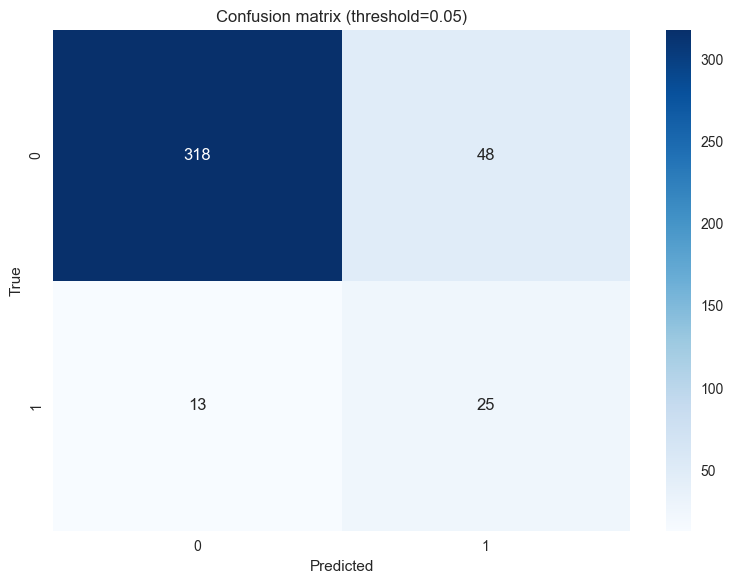

Sensitivity: 0.6579
Specificity: 0.8689
Accuracy: 0.8490


In [23]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.05)

## Test SMOTE oversampling

Training model with default hyperparameters...

Fold 0: ROC AUC = 0.8089
Fold 1: ROC AUC = 0.7979
Fold 2: ROC AUC = 0.9024
Fold 3: ROC AUC = 0.8031
Fold 4: ROC AUC = 0.7789

Overall ROC AUC across folds: 0.8190


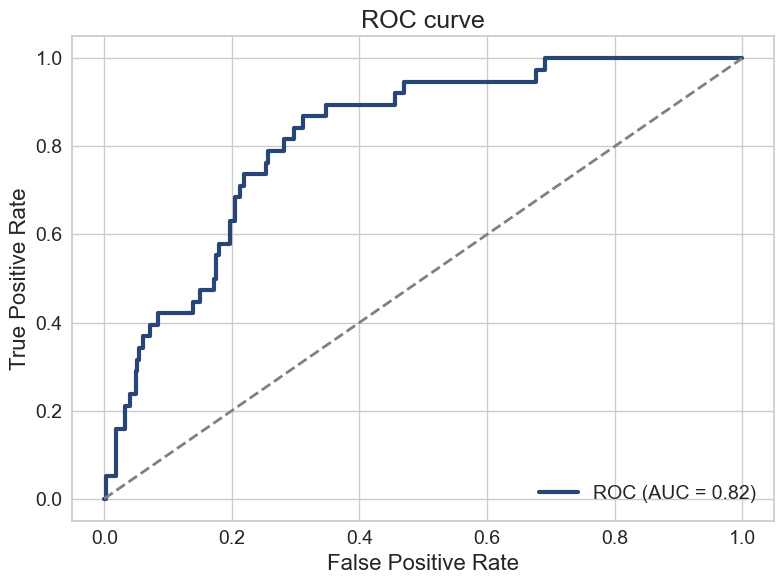

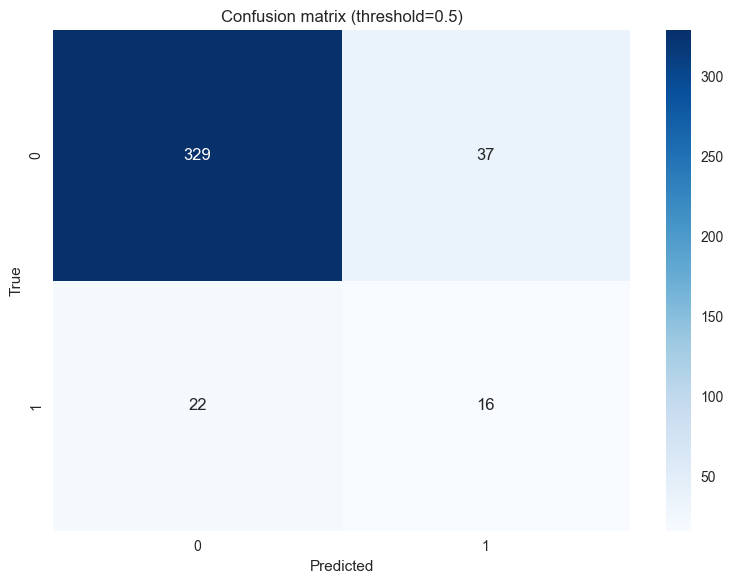

Sensitivity: 0.4211
Specificity: 0.8989
Accuracy: 0.8540


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



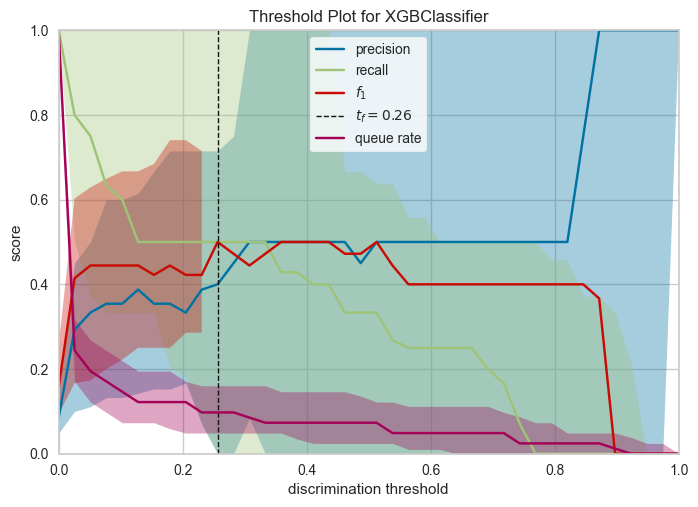

Brier score: 0.1104


In [24]:
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_weights = train_and_evaluate_model_with_smote(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc, fig_width=800)
plot_confusion_matrix(y_true, y_pred)
# plot_feature_importances(trained_model, X, y, title='Feature Importances for Nodal Involvement Prediction')
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")

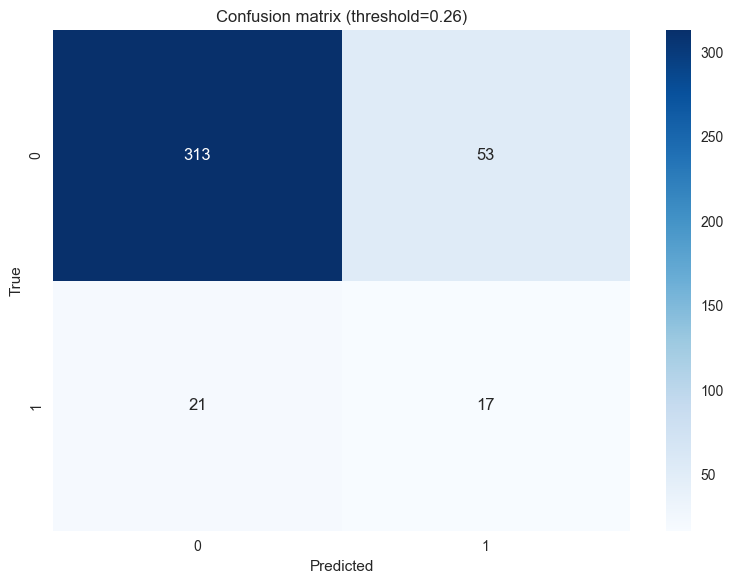

Sensitivity: 0.4474
Specificity: 0.8552
Accuracy: 0.8168


In [25]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.26)

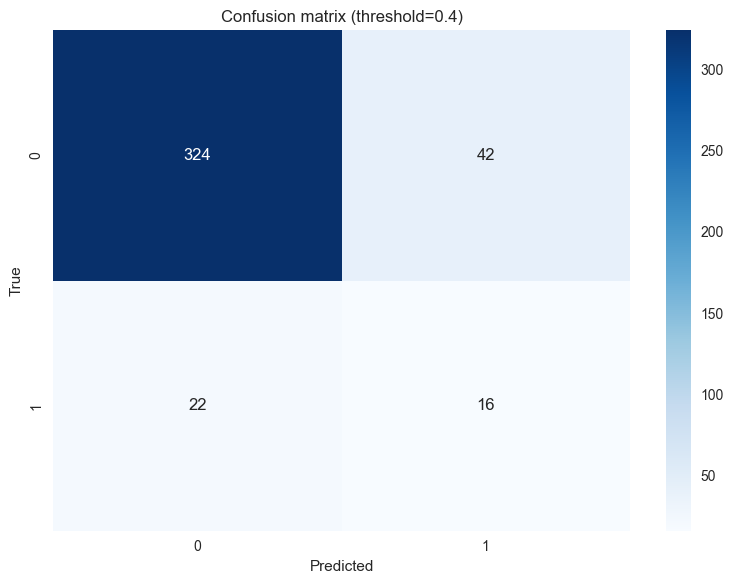

Sensitivity: 0.4211
Specificity: 0.8852
Accuracy: 0.8416


In [26]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.4)

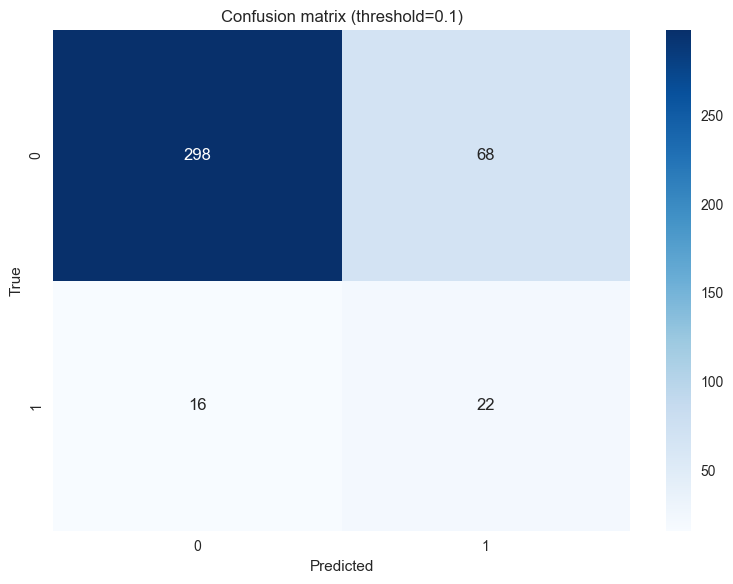

Sensitivity: 0.5789
Specificity: 0.8142
Accuracy: 0.7921


In [32]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.1)

## Optimizing XGBoost

### Maximize AUC

Tuning hyperparameters...

Best hyperparameters: {'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0, 'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
Best roc_auc score: 0.8843975734623747

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.6, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.05, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 100, 'n_jobs': Non

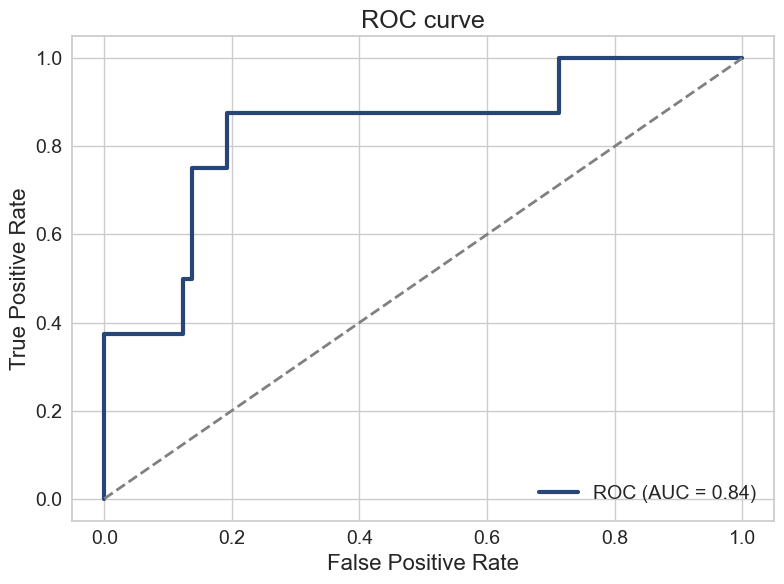

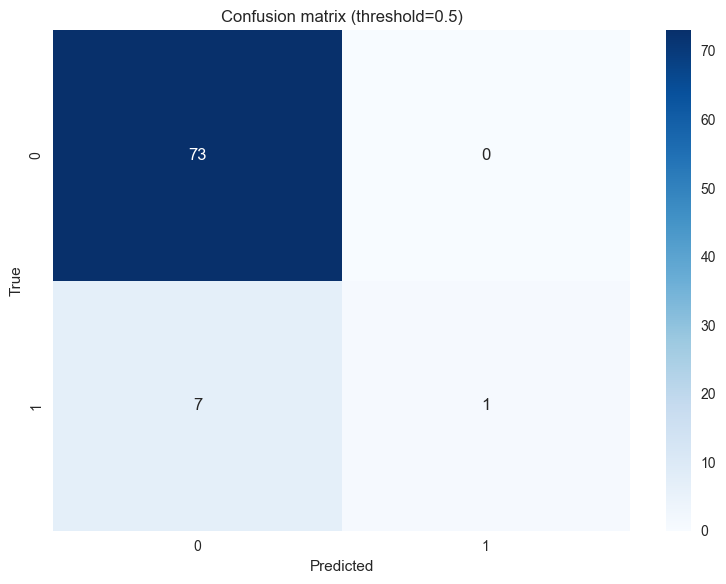

Sensitivity: 0.1250
Specificity: 1.0000
Accuracy: 0.9136
Preparation of a new explainer is initiated

  -> data              : 404 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x0000015F74D76DE0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.00308, mean = 0.088, max = 0.784
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.511, mean = 0.00609, max = 0.99
  -> model_info        : package sklearn

A new explainer has been created!


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



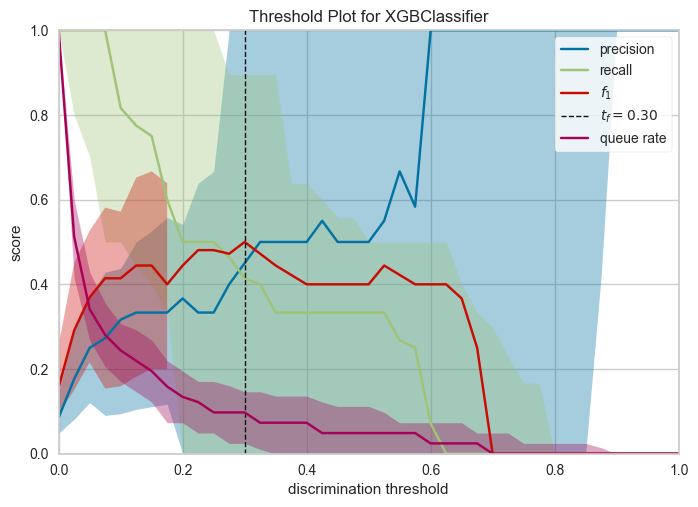

Brier score: 0.0667


In [33]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 800],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='roc_auc', tuning_test_size=0.2)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc, fig_width=800)
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y, title='Feature Importances for Nodal Involvement Prediction')
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")


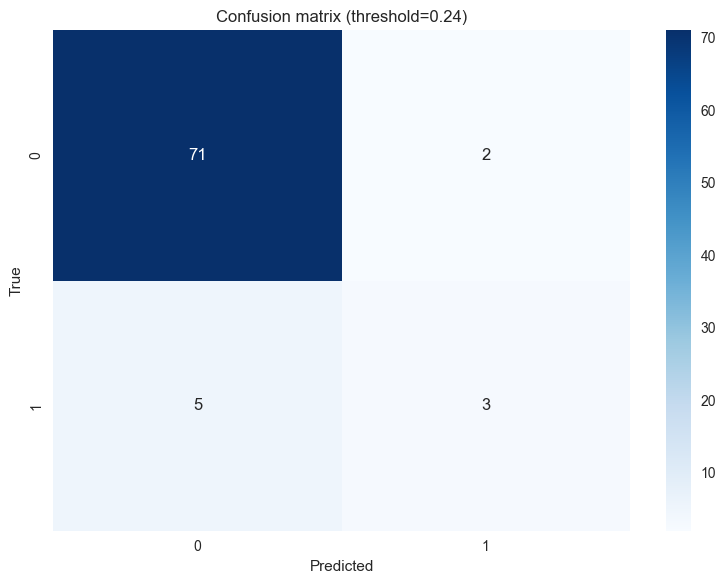

Sensitivity: 0.3750
Specificity: 0.9726
Accuracy: 0.9136


In [34]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.24)

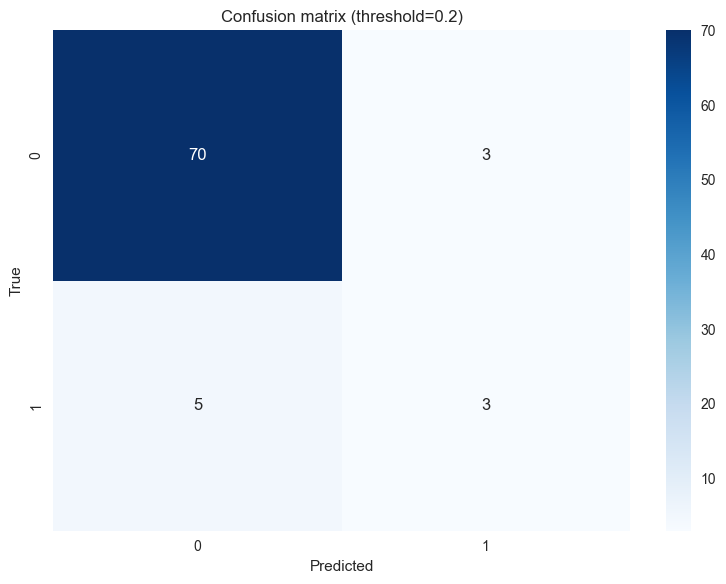

Sensitivity: 0.3750
Specificity: 0.9589
Accuracy: 0.9012


In [35]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.2)

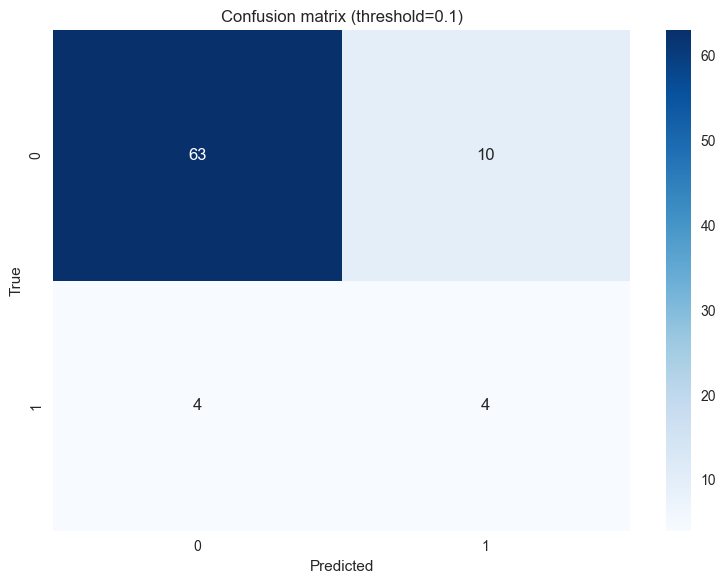

Sensitivity: 0.5000
Specificity: 0.8630
Accuracy: 0.8272


In [36]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.1)

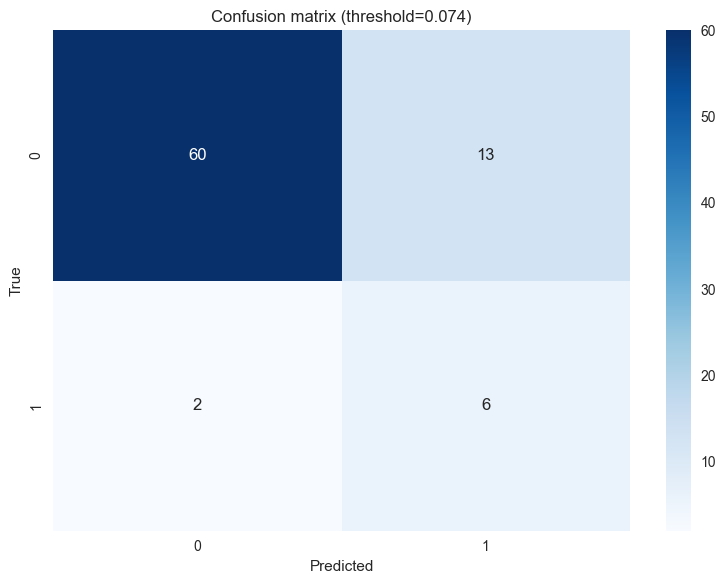

Sensitivity: 0.7500
Specificity: 0.8219
Accuracy: 0.8148


In [37]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.074)

### Maximize brier score

Tuning hyperparameters...

Best hyperparameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 0, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__subsample': 1.0}
Best neg_brier_score score: -0.06461385675285194

Model hyperparameters after tuning: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 200, 'n_

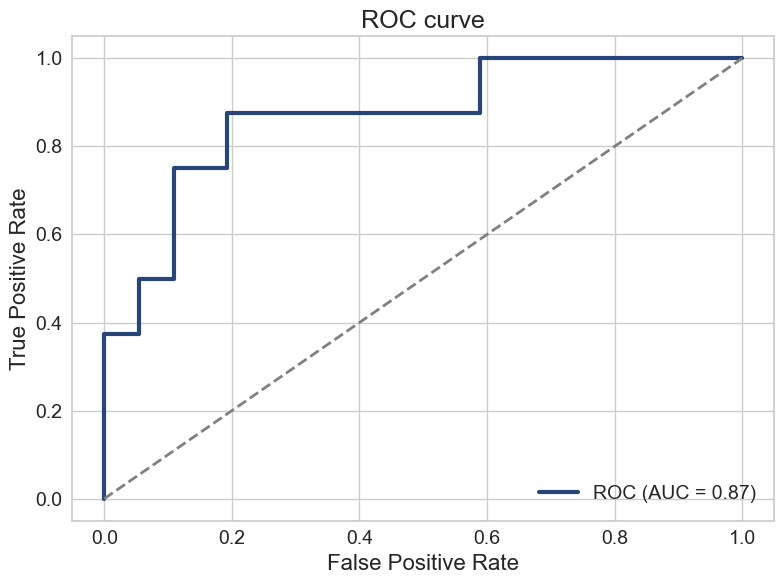

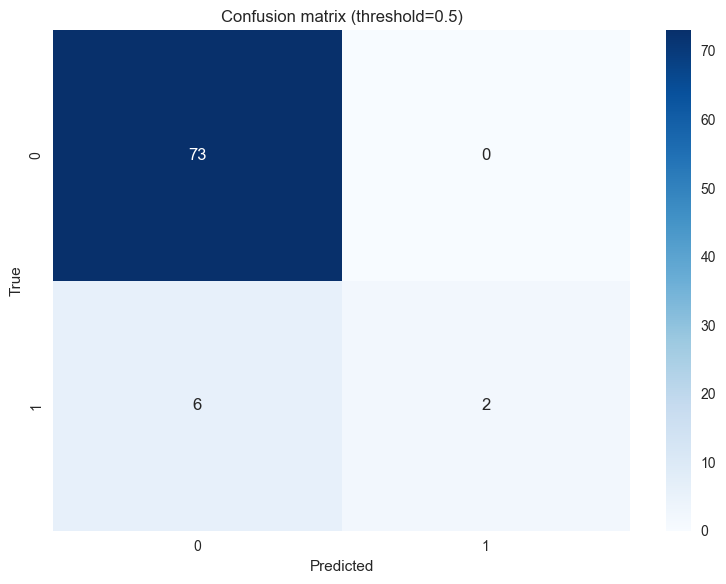

Sensitivity: 0.2500
Specificity: 1.0000
Accuracy: 0.9259
Preparation of a new explainer is initiated

  -> data              : 404 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 404 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x0000015F74D76DE0> will be used (default)
  -> predict function  : Accepts only pandas.DataFrame, numpy.ndarray causes problems.
  -> predicted values  : min = 0.0187, mean = 0.0872, max = 0.633
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.573, mean = 0.00681, max = 0.968
  -> model_info        : package sklearn

A new explainer has been created!


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



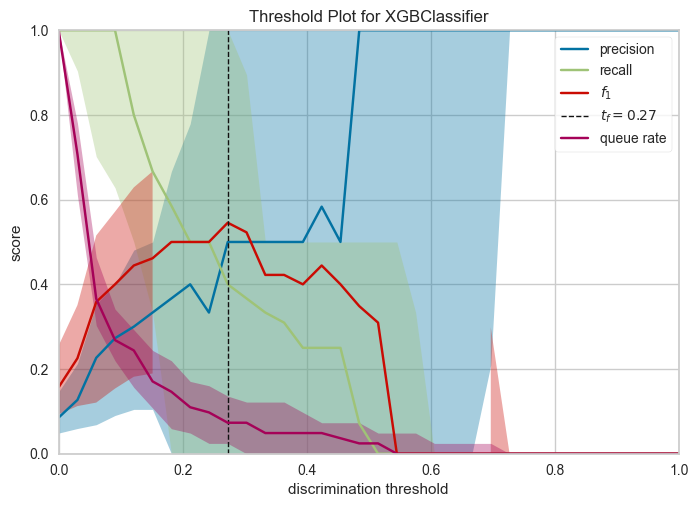

Brier score: 0.0664


In [47]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 800],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc, fig_width=800, save_path='n_plus_roc.png')
plot_confusion_matrix(y_true, y_pred)
plot_feature_importances(trained_model, X, y, title='Feature Importances for Nodal Involvement Prediction')
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")

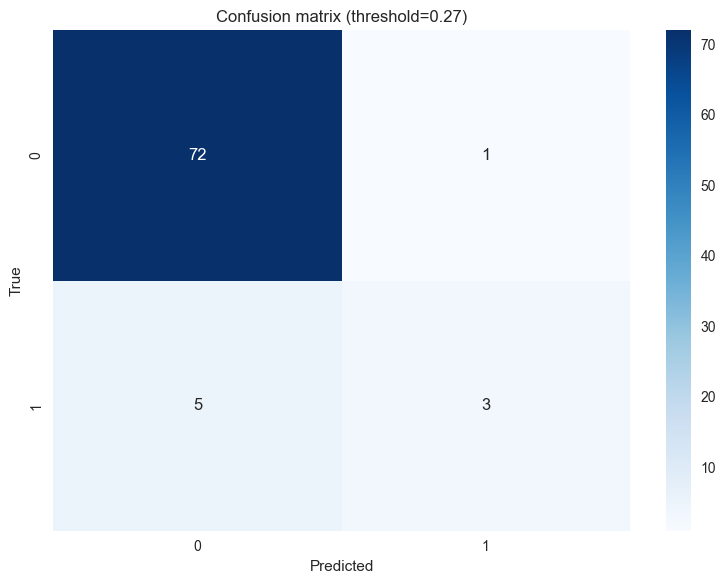

Sensitivity: 0.3750
Specificity: 0.9863
Accuracy: 0.9259


In [48]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.27)

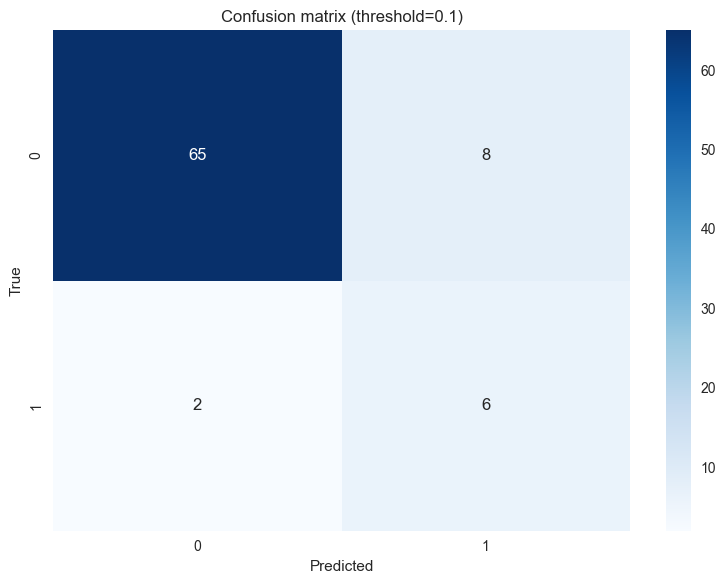

Sensitivity: 0.7500
Specificity: 0.8904
Accuracy: 0.8765


In [49]:
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.1)

## Optimize XGBoost with SMOTE

Tuning hyperparameters with SMOTE on training set only...

Best hyperparameters: {'classifier__colsample_bytree': 0.6, 'classifier__gamma': 0.1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200, 'classifier__subsample': 0.6}
Best neg_brier_score score: -0.059930950033484476

Best params after tuning:
{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}

ROC AUC on test set: 0.8185


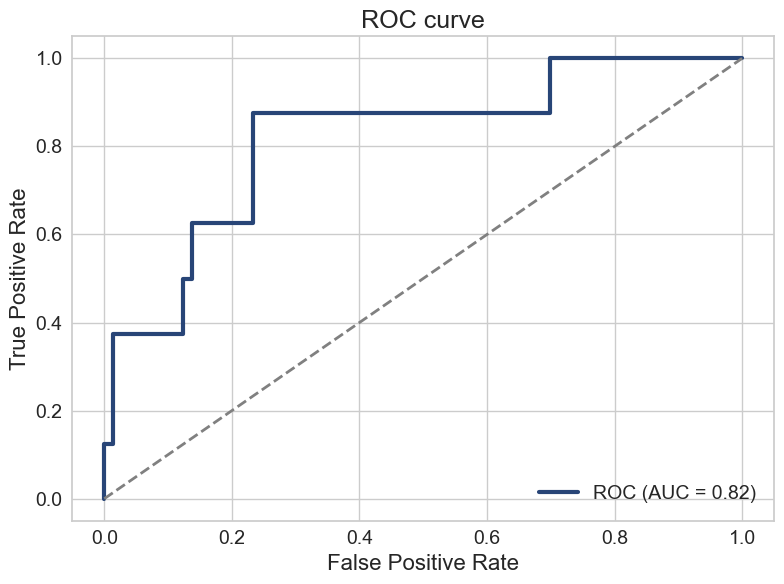

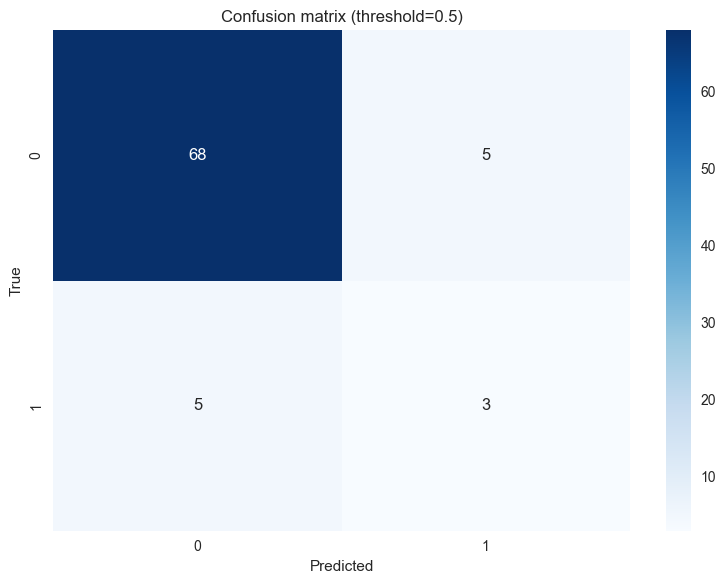

Sensitivity: 0.3750
Specificity: 0.9315
Accuracy: 0.8765


b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\sklearn\metrics\_ranking.py:1046: UserWarning:

No positive class found in y_true, recall is set to one for all thresholds.



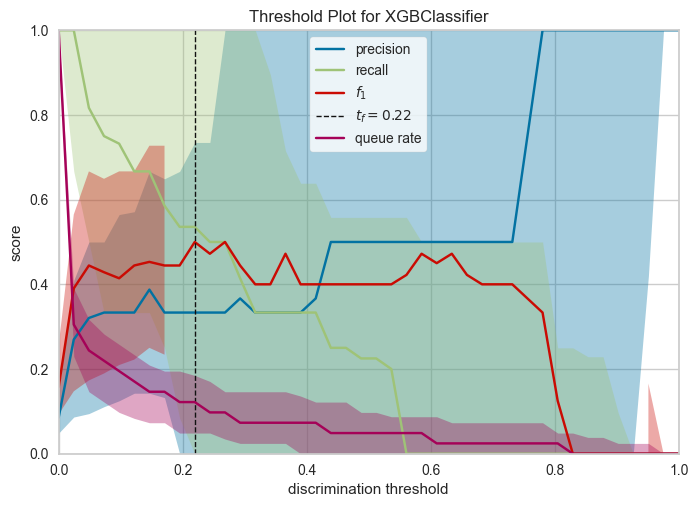

Brier score: 0.0872


In [50]:
param_grid = {
    'classifier__n_estimators': [100, 200, 400, 800],
    'classifier__max_depth': [3, 5],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 0.9, 1.0],
    'classifier__gamma': [0, 0.1, 0.2]
}
untrained_model = XGBClassifier(random_state=42)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model_with_smote(untrained_model, X, y, numerical_cols, categorical_cols, n_folds=5, tune_params=True, param_grid=param_grid, tuning_scoring='neg_brier_score', tuning_test_size=0.2)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc, fig_width=800)
plot_confusion_matrix(y_true, y_pred)
# plot_feature_importances(trained_model, X, y, title='Feature Importances for Nodal Involvement Prediction')
plot_discrimination_threshold(trained_model, X, y)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")

## Test TabPFN

In [6]:
from tabpfn import TabPFNClassifier
from tabpfn.constants import ModelVersion

In [14]:
clf = TabPFNClassifier(random_state=42, model_path='../.venv/tabpfn-v2.5-classifier-v2.5_default.ckpt')
# clf = TabPFNClassifier.create_default_for_version(ModelVersion.V2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf.fit(X_train, y_train)
prediction_probabilities = clf.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, prediction_probabilities[:, 1]))

b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\tabpfn\classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


ROC AUC: 0.8618686868686869


Training model with default hyperparameters...



b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\tabpfn\classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Fold 0:
ROC AUC score: 0.8108108108108107



b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\tabpfn\classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Fold 1:
ROC AUC score: 0.8698630136986301



b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\tabpfn\classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Fold 2:
ROC AUC score: 0.9212328767123288



b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\tabpfn\classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Fold 3:
ROC AUC score: 0.8065068493150684



b:\Politechnika\Labs\V semester\AI\microscopic-epe-proj\.venv\Lib\site-packages\tabpfn\classifier.py:616: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(


Fold 4:
ROC AUC score: 0.9197651663405089

Total scores:
ROC AUC score: 0.8648979004889272



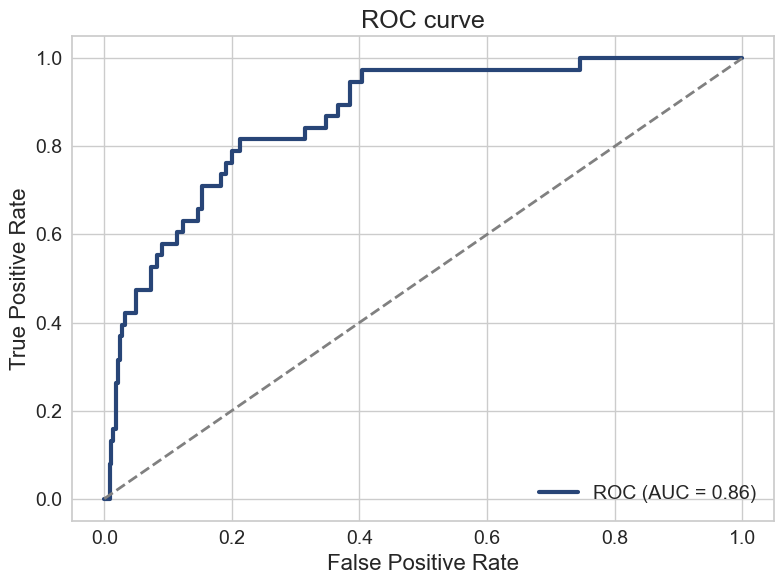

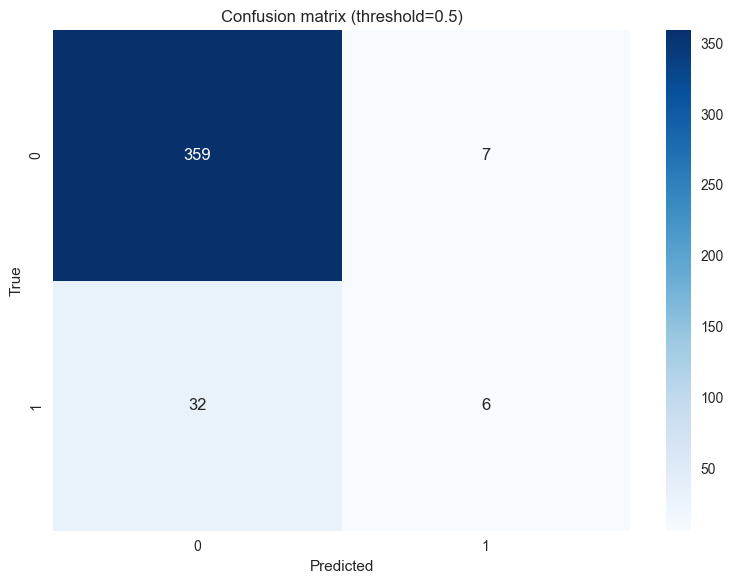

Sensitivity: 0.1579
Specificity: 0.9809
Accuracy: 0.9035
Brier score: 0.0669


In [18]:
clf = TabPFNClassifier(random_state=42, model_path="../.venv/tabpfn-v2.5-classifier-v2.5_default.ckpt")
# clf = TabPFNClassifier.create_default_for_version(ModelVersion.V2)

y_true, y_pred, y_pred_probs, false_positive_rate, true_positive_rate, total_roc_auc, trained_model, best_params = train_and_evaluate_model(clf, X, y, numerical_cols, categorical_cols, n_folds=5)

plot_roc(false_positive_rate, true_positive_rate, total_roc_auc, fig_width=800)
plot_confusion_matrix(y_true, y_pred)
brier = brier_score_loss(y_true, y_pred_probs)
print(f"Brier score: {brier:.4f}")